In [1]:
#"D:\Academics\Semester-6\A2- Artificial Intelligence\Project\Implementation\Dataset\Crop_recommendation.csv"

In [2]:
# libraries
import numpy as np
import pandas as pd

In [28]:
# inspect the dataset
df = pd.read_csv(r"D:\Academics\Semester-6\A2- Artificial Intelligence\Project\Implementation\Dataset\Crop_recommendation.csv")
X = df.drop(['label'], axis=1)
y = df.label
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# missing data
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

X_standardized = X.copy()
for col in X_standardized.columns:
    X_standardized[col] = StandardScaler().fit_transform(X_standardized[col].values.reshape(-1, 1))
    
X_standardized.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
df_pcs = pca.fit_transform(X_standardized.values)
df_pca = pd.DataFrame(data = df_pcs, columns = ["pc_1", "pc_2", "pc_3","Pc_4"])

df_pca = pd.concat([df_pca, y], axis = 1)
df_pca

,pc_1,pc_2,pc_3,Pc_4,label
0,-0.582869,-0.844586,1.373343,-1.614129,rice
1,-0.474635,-0.784895,1.252178,-1.792762,rice
2,-0.634068,-0.694522,1.179332,-1.818106,rice
3,-1.047920,-1.087658,1.393351,-0.982401,rice
4,-0.873258,-0.658673,1.455685,-2.335012,rice
...,...,...,...,...,...
2195,-1.260921,-0.618363,0.711297,-1.014970,coffee
2196,-1.355583,-0.154043,0.701649,-0.197683,coffee
2197,-1.158384,-0.640475,1.045840,-1.301841,coffee
2198,-1.219188,0.052390,0.180855,-0.990499,coffee


In [8]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [9]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(kernel='linear') # Linear Kernel
y_pred = svc.fit(X_train, y_train).predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", svc_accuracy)
print(np.unique(y_pred))

Accuracy: 0.9795454545454545
['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [10]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test),metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        18
      cotton       1.00      0.94      0.97        18
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       0.95      1.00      0.98        20
       mango       1.00      0.95      0.97        20
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [11]:
from joblib import Parallel, delayed
import joblib
  
#saving the model as pickle file soil_crop.pkl  

joblib.dump(svc, 'soil_crop.pkl')

['soil_crop.pkl']

In [27]:
# Load the model from the file
from random import *

Model = joblib.load('soil_crop.pkl')

x = randint(1,2000)
print(df.iloc[x])
# Use the loaded model to make predictions
Model.predict([df.loc[x,df.columns!='label']])

N                     22
P                     51
K                     16
temperature    27.965837
humidity       61.349001
ph              8.639586
rainfall       70.104721
label          mothbeans
Name: 596, dtype: object


array(['mothbeans'], dtype=object)

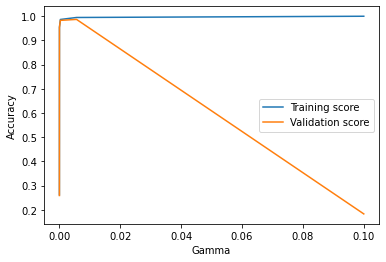

In [44]:
from sklearn.model_selection import validation_curve
from matplotlib import pyplot as plt
param_range = np.logspace(-6, -1, 5)

# Calculate the training and validation scores for each value of the hyperparameter
train_scores, test_scores = validation_curve(SVC(gamma=0.1), X_train, y_train,
                                             param_name='gamma',
                                             param_range=param_range,
                                             cv=3)

plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.show()